<a href="https://colab.research.google.com/github/viniciusanl/Data-Scientist/blob/master/Algoritmo_KMeans_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias para a utilização do Kmeans

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#Exemplo do passo a passo com KMeans
Criação do conjunto de dados do dataset

<function matplotlib.pyplot.grid>

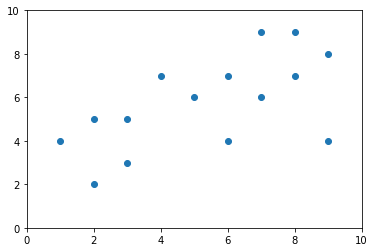

In [3]:
dataset = np.array([[1,4],[2,2],[2,5],[3,3],[3,5],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid

Utilizando a biblioteca Kmeans encontramos 3 clusters no conjunto de dados definido. O parâmetro init define a estratégia utilizada para a inicialização dos centróides. O valor **k-means++** é um algoritmo interno da biblioteca para uma definição mais assertiva dos centróides, utilizando nesse algoritmo também o parâmetro **n_init**.

<function matplotlib.pyplot.show>

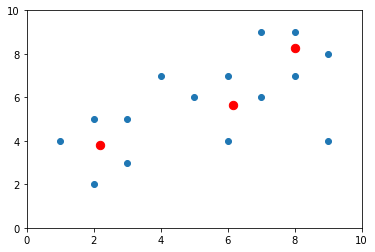

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'red')
plt.show

No exemplo abaixo  com a adição do parâmetro **c=pred_y** podemos identificar separadamente os clusters.

<function matplotlib.pyplot.show>

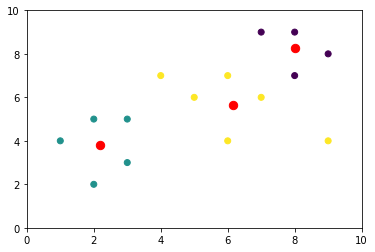

In [19]:
plt.scatter(dataset[:,0], dataset[:,1], c=pred_y)
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'red')
plt.show

#Exemplo com dados aleatórios

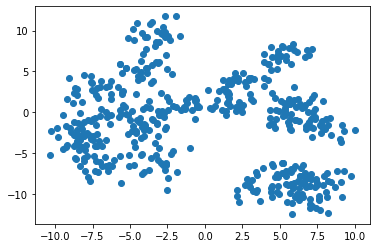

In [7]:
x, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(x[:,0], x[:,1])

O gráfico de Elbow (gráfico de cotovelo) serve para determinar o número de clusters que poderá ser utilizada via segmentação com o Kmeans.

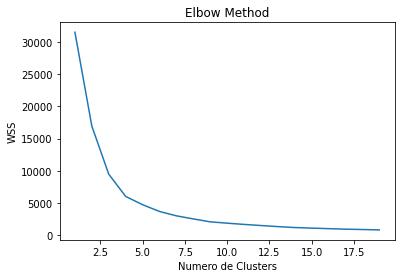

In [8]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title('Elbow Method')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Sendo assim, na curva do gráfico de Elbow, é interessante a utilização de 5 clusters.

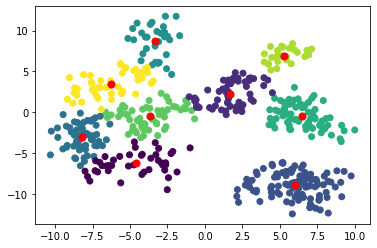

In [9]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')
plt.show()

O código abaixo verifica a posição do centroide

In [0]:
kmeans.cluster_centers_

array([[-6.00093158, -3.22985389],
       [ 2.37055809,  3.33784875],
       [ 6.01305095, -8.90895584],
       [-4.77234911,  5.66811008],
       [ 6.54167452, -0.57833569]])

O código abaixo verifica  a soma dos quadrados intra-clusters (wcss) ao final da execução

In [0]:
# kmeans.inertia_
# print(kmeans.inertia_)

for i in range(0, 3):
  kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init=10)
  pred_y = kmeans.fit_predict(x)
  print(i,kmeans.inertia_)

0 9464.847250570496
1 9464.847250570496
2 9464.847250570496


#Outras fontes de pesquisa para melhorar o código KMeans

Nos trechos abaixo estão a criação da função **calculate_wcss** que é responsável por fazer a soma dos quadrados e a função **optimal_number_of_clusters** responsável por definir uma melhor quantidade de clusters para a nossa análise.

In [0]:
import math
 
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
 
    return wcss
 
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]
 
    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [0]:
# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(x)
print(sum_of_squares)

[[ -5.2620148   -0.24728593]
 [  5.31683671  -0.33089844]
 [ -6.83945881  -4.08790686]
 [  5.97441173   3.04157261]
 [ -4.7083547   -3.63185291]
 [ -2.6838669    9.22071939]
 [ -4.80139396  -1.72755734]
 [  1.23997568   3.92758838]
 [  0.83697294   1.51110033]
 [ -7.82975044  -7.87438995]
 [  4.85223514   7.55122822]
 [  4.76074876   6.77723316]
 [  6.92134276   7.014905  ]
 [ -7.61056134  -1.09433861]
 [ -9.23921931  -4.28234216]
 [ -2.69331481  -2.10967855]
 [  5.62665398   1.07296993]
 [ -3.21509213  -1.42903039]
 [  5.45578904 -10.95674025]
 [ -8.2318645    1.25370414]
 [  6.22044468   1.63372903]
 [ -5.09953625  -6.58268794]
 [ -8.60648993  -3.93596728]
 [ -5.59495235  -0.18780896]
 [ -5.55984591   2.28773326]
 [  7.04465952 -10.58723917]
 [  3.44558397  -9.5552469 ]
 [  1.63630922   2.27043872]
 [  6.35636084  -7.79516068]
 [ -7.49773533  -2.87535571]
 [ -1.8605019   -7.31188875]
 [ -0.38382812   0.58716666]
 [  2.95270625   4.15851535]
 [  4.84647863  -7.92150341]
 [ -7.97030486

In [0]:
# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)
print(n)

6


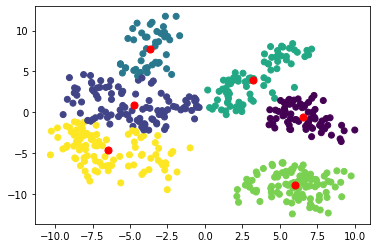

In [0]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red')
plt.show()

In [0]:
new_dataset = make_blobs(n_samples=500, centers=20, random_state=999)

In [15]:
print(new_dataset)

(array([[ -5.2620148 ,  -0.24728593],
       [  5.31683671,  -0.33089844],
       [ -6.83945881,  -4.08790686],
       [  5.97441173,   3.04157261],
       [ -4.7083547 ,  -3.63185291],
       [ -2.6838669 ,   9.22071939],
       [ -4.80139396,  -1.72755734],
       [  1.23997568,   3.92758838],
       [  0.83697294,   1.51110033],
       [ -7.82975044,  -7.87438995],
       [  4.85223514,   7.55122822],
       [  4.76074876,   6.77723316],
       [  6.92134276,   7.014905  ],
       [ -7.61056134,  -1.09433861],
       [ -9.23921931,  -4.28234216],
       [ -2.69331481,  -2.10967855],
       [  5.62665398,   1.07296993],
       [ -3.21509213,  -1.42903039],
       [  5.45578904, -10.95674025],
       [ -8.2318645 ,   1.25370414],
       [  6.22044468,   1.63372903],
       [ -5.09953625,  -6.58268794],
       [ -8.60648993,  -3.93596728],
       [ -5.59495235,  -0.18780896],
       [ -5.55984591,   2.28773326],
       [  7.04465952, -10.58723917],
       [  3.44558397,  -9.5552469 ],
